# IBM Data Science Capstone Project


## Importing libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

### data collection

In [2]:
List_url = "https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shanghai"
#List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [3]:
soup = BeautifulSoup(source, 'xml')
tables=soup.find_all('table')
#print(re.findall(r"\d+\.?\d*",'310104XHI')[0])
column_names = ['Name','Chinese','Hanyu Pinyin','Division code','Area shorthand','Area (km²)','Population (2018 census)','Density (/km²)']
df = pd.DataFrame(columns = column_names)

In [4]:
 for tr_cell in tables[4].find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        if '[' in td_cell.text.strip():
            n=td_cell.text.strip().find('[')
            row_data.append(td_cell.text.strip()[0:n-1])
        else:
            row_data.append(td_cell.text.strip())
    if len(row_data)==0:
        pass
    else:
        row_data=row_data[1:len(row_data)]
        df.loc[len(df)] = row_data
df
            

,Name,Chinese,Hanyu Pinyin,Division code,Area shorthand,Area (km²),Population (2018 census),Density (/km²)
0,Huangpu Distric,黄浦区,Huángpǔ Qū,310101,HGP,20.46,"653,800","31,955"
1,Xuhui District,徐汇区,Xúhuì Qū,310104,XHI,54.76,"1,084,400","19,803"
2,Changning District,长宁区,Chángníng Qū,310105,CNQ,38.30,"694,000","18,120"
3,Jing'an District,静安区,Jìng'ān Qū,310106,JAQ,36.88,"1,062,800","28,818"
4,Putuo District,普陀区,Pǔtuó Qū,310107,PTQ,54.83,"1,281,900","23,380"
5,Hongkou District,虹口区,Hóngkǒu Qū,310109,HKQ,23.48,"797,000","33,944"
6,Yangpu District,杨浦区,Yángpǔ Qū,310110,YPU,60.73,"1,312,700","21,615"
7,Pudong New Area,浦东新区,Pǔdōng Xīnqū,310115,PDX,"1,210.41","5,550,200","4,585"
8,Minhang District,闵行区,Mǐnháng Qū,310112,MHQ,370.75,"2,543,500","6,860"
9,Baoshan District,宝山区,Bǎoshān Qū,310113,BAO,270.99,"2,042,300","7,536"


In [9]:
# add Real GDP per capita to the table(Unit: RMB 10,000)
GDP_data=[39.61,25.74,23.78,21.73,8.71,14.53,15.96,22.87,9.89,7.60,16.34,13.38,8.92,9.46,10.13,5.58]
len(GDP_data)
df['Real GDP per capita(Unit: RMB 10,000)']=GDP_data
df

,Name,Chinese,Hanyu Pinyin,Division code,Area shorthand,Area (km²),Population (2018 census),Density (/km²),"Real GDP per capita(Unit: RMB 10,000)"
0,Huangpu Distric,黄浦区,Huángpǔ Qū,310101,HGP,20.46,653800.0,"31,955",39.61
1,Xuhui District,徐汇区,Xúhuì Qū,310104,XHI,54.76,1084400.0,"19,803",25.74
2,Changning District,长宁区,Chángníng Qū,310105,CNQ,38.30,694000.0,"18,120",23.78
3,Jing'an District,静安区,Jìng'ān Qū,310106,JAQ,36.88,1062800.0,"28,818",21.73
4,Putuo District,普陀区,Pǔtuó Qū,310107,PTQ,54.83,1281900.0,"23,380",8.71
5,Hongkou District,虹口区,Hóngkǒu Qū,310109,HKQ,23.48,797000.0,"33,944",14.53
6,Yangpu District,杨浦区,Yángpǔ Qū,310110,YPU,60.73,1312700.0,"21,615",15.96
7,Pudong New Area,浦东新区,Pǔdōng Xīnqū,310115,PDX,"1,210.41",5550200.0,"4,585",22.87
8,Minhang District,闵行区,Mǐnháng Qū,310112,MHQ,370.75,2543500.0,"6,860",9.89
9,Baoshan District,宝山区,Bǎoshān Qū,310113,BAO,270.99,2042300.0,"7,536",7.60


In [13]:
#if you data is not folat ,you can use this code
'''
def float_change(var):
    new_value = var.replace(",","")
    return float(new_value)
df_new=df
df_new['Population (2018 census)']=df_new['Population (2018 census)'].apply(float_change)
df_new.sort_values(["Real GDP per capita(Unit: RMB 10,000)"],ascending=False)
'''

'\ndef float_change(var):\n    new_value = var.replace(",","")\n    return float(new_value)\ndf_new=df\ndf_new[\'Population (2018 census)\']=df_new[\'Population (2018 census)\'].apply(float_change)\ndf_new.sort_values(["Real GDP per capita(Unit: RMB 10,000)"],ascending=False)\n'

In [14]:
newDf = pd.DataFrame(df_new, columns=['Name', 'Division code', 'Population (2018 census)','Real GDP per capita(Unit: RMB 10,000)'])[(df['Population (2018 census)'] > 500000)& (df['Real GDP per capita(Unit: RMB 10,000)']> 6)]
newDf=newDf.drop(index=[11])
newDf

,Name,Division code,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)"
0,Huangpu Distric,310101,653800.0,39.61
1,Xuhui District,310104,1084400.0,25.74
2,Changning District,310105,694000.0,23.78
3,Jing'an District,310106,1062800.0,21.73
4,Putuo District,310107,1281900.0,8.71
5,Hongkou District,310109,797000.0,14.53
6,Yangpu District,310110,1312700.0,15.96
7,Pudong New Area,310115,5550200.0,22.87
8,Minhang District,310112,2543500.0,9.89
9,Baoshan District,310113,2042300.0,7.60


In [15]:
#some reason I can not use the geocoder,therefor I check the geocoder with this  Website  https://jingwei.supfree.net/mengzi.asp?id=812
# I got this table
Latitude_data=[31.23,31.18,31.22,31.23,31.40,31.27,31.27,31.22,31.12,31.40,31.38,31.02,31.15,30.92]
Longitude_data=[121.48,121.43,121.42,121.45,121.25,121.50,121.52,121.53,121.38,121.48,121.27,121.22,121.12,121.47]
newDf['Latitude']=Latitude_data
newDf['Longitude']=Longitude_data
newDf

,Name,Division code,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude
0,Huangpu Distric,310101,653800.0,39.61,31.23,121.48
1,Xuhui District,310104,1084400.0,25.74,31.18,121.43
2,Changning District,310105,694000.0,23.78,31.22,121.42
3,Jing'an District,310106,1062800.0,21.73,31.23,121.45
4,Putuo District,310107,1281900.0,8.71,31.40,121.25
5,Hongkou District,310109,797000.0,14.53,31.27,121.50
6,Yangpu District,310110,1312700.0,15.96,31.27,121.52
7,Pudong New Area,310115,5550200.0,22.87,31.22,121.53
8,Minhang District,310112,2543500.0,9.89,31.12,121.38
9,Baoshan District,310113,2042300.0,7.60,31.40,121.48


In [16]:
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

CLIENT_ID = 'WYAVTWVUAT3Y1TB0J5QFHOU1VXLYPDFWO01QDALLEKY4POW4' 
CLIENT_SECRET = 'APL4WGPKSZCXBR5LPIYWMQZUXJTTAHQVJOADCUI5GQWJOKZG' 
VERSION = '20201126'

def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    #print(venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    #print(nearby_venues)
    nearby_venues.columns = ['District name', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    return(nearby_venues)

In [17]:
shanghai_venues = getNearbyVenues(names=newDf['Name'],
                                   latitudes=newDf['Latitude'],
                                   longitudes=newDf['Longitude']
                                  )
shanghai_venues

Huangpu Distric
Xuhui District
Changning District
Jing'an District
Putuo District
Hongkou District
Yangpu District
Pudong New Area
Minhang District
Baoshan District
Jiading District
Songjiang District
Qingpu District
Fengxian District


,District name,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Huangpu Distric,31.23,121.48,Campanile Hotel and Restaurant,31.232123,121.479144,Hotel
1,Huangpu Distric,31.23,121.48,台北纯K,31.230826,121.477331,Karaoke Bar
2,Huangpu Distric,31.23,121.48,Yu Garden Café,31.229482,121.483501,Café
3,Huangpu Distric,31.23,121.48,Old Beijing Qianmen Roast Duck (老北京前门烤鸭),31.232480,121.482457,Peking Duck Restaurant
4,Huangpu Distric,31.23,121.48,德兴面馆,31.229485,121.476949,Noodle House
5,Huangpu Distric,31.23,121.48,Renaissance Shanghai Yu Garden Hotel (上海豫园万丽酒店),31.229458,121.483456,Hotel
6,Huangpu Distric,31.23,121.48,Club Lounge,31.229391,121.483472,Hotel Bar
7,Huangpu Distric,31.23,121.48,JZ Latino,31.229493,121.483696,Lounge
8,Huangpu Distric,31.23,121.48,小绍兴,31.229777,121.476037,Chinese Restaurant
9,Huangpu Distric,31.23,121.48,Long Time Ago (很久以前只是家串店),31.228679,121.476906,BBQ Joint


In [18]:
print('There are {} uniques categories.'.format(len(shanghai_venues['Venue Category'].unique())))

There are 70 uniques categories.


## Analyzing the Districts

In [19]:
#one hot encoding
shanghai_onehot = pd.get_dummies(shanghai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
shanghai_onehot['District name'] = shanghai_venues['District name'] 

# move neighborhood column to the first column
fixed_columns = [shanghai_onehot.columns[-1]] + list(shanghai_onehot.columns[:-1])
shanghai_onehot =shanghai_onehot[fixed_columns]

shanghai_onehot

,District name,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bistro,Boutique,Brewery,Burger Joint,...,Squash Court,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Huangpu Distric,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Huangpu Distric,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
shanghai_grouped = shanghai_onehot.groupby('District name').mean().reset_index()
shanghai_grouped

,District name,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Bistro,Boutique,Brewery,Burger Joint,...,Squash Court,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Baoshan District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Changning District,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000
2,Fengxian District,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hongkou District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Huangpu Distric,0.020833,0.020833,0.000000,0.041667,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.020833,0.000000,0.020833,0.000000,0.000000,0.000000
5,Jiading District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jing'an District,0.000000,0.000000,0.035714,0.000000,0.000000,0.017857,0.017857,0.0,0.035714,...,0.0,0.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.053571,0.035714,0.035714
7,Minhang District,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Pudong New Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Putuo District,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Let's see each neighborhood along with the top 5 most common venues

In [21]:
num_top_venues = 5

for hood in shanghai_grouped['District name']:
    print("----"+hood+"----")
    temp = shanghai_grouped[shanghai_grouped['District name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baoshan District----
                  venue  freq
0                Office  0.25
1    Chinese Restaurant  0.25
2         Shopping Mall  0.25
3  Fast Food Restaurant  0.25
4         Movie Theater  0.00


----Changning District----
                venue  freq
0  Chinese Restaurant  0.21
1         Coffee Shop  0.17
2              Lounge  0.08
3            Beer Bar  0.08
4               Hotel  0.08


----Fengxian District----
              venue  freq
0  Asian Restaurant  0.33
1       Coffee Shop  0.33
2        Steakhouse  0.33
3            Office  0.00
4             Plaza  0.00


----Hongkou District----
              venue  freq
0             Plaza  0.25
1       Pizza Place  0.25
2         Multiplex  0.25
3              Park  0.25
4  Asian Restaurant  0.00


----Huangpu Distric----
                venue  freq
0               Hotel  0.12
1         Coffee Shop  0.12
2  Chinese Restaurant  0.12
3   Hotpot Restaurant  0.06
4      Sandwich Place  0.04


----Jiading District----
          

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District name'] = shanghai_grouped['District name']

for ind in np.arange(shanghai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(shanghai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,District name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baoshan District,Fast Food Restaurant,Office,Chinese Restaurant,Shopping Mall,Vietnamese Restaurant,Gym,Electronics Store,Furniture / Home Store,Grocery Store,Gym / Fitness Center
1,Changning District,Chinese Restaurant,Coffee Shop,Hotel,Beer Bar,Lounge,Korean Restaurant,Café,Pizza Place,Noodle House,Convenience Store
2,Fengxian District,Asian Restaurant,Coffee Shop,Steakhouse,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Historic Site
3,Hongkou District,Multiplex,Plaza,Park,Pizza Place,Hotel,Hostel,History Museum,Historic Site,Gym / Fitness Center,Hotel Bar
4,Huangpu Distric,Chinese Restaurant,Coffee Shop,Hotel,Hotpot Restaurant,Gym,Bar,Italian Restaurant,Sandwich Place,Hostel,Movie Theater


## Using Machine Learning for Clustering Neighborhoods
For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.

First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [25]:
max_range = 7

shanghai_grouped_clustering = shanghai_grouped.drop('District name', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = shanghai_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

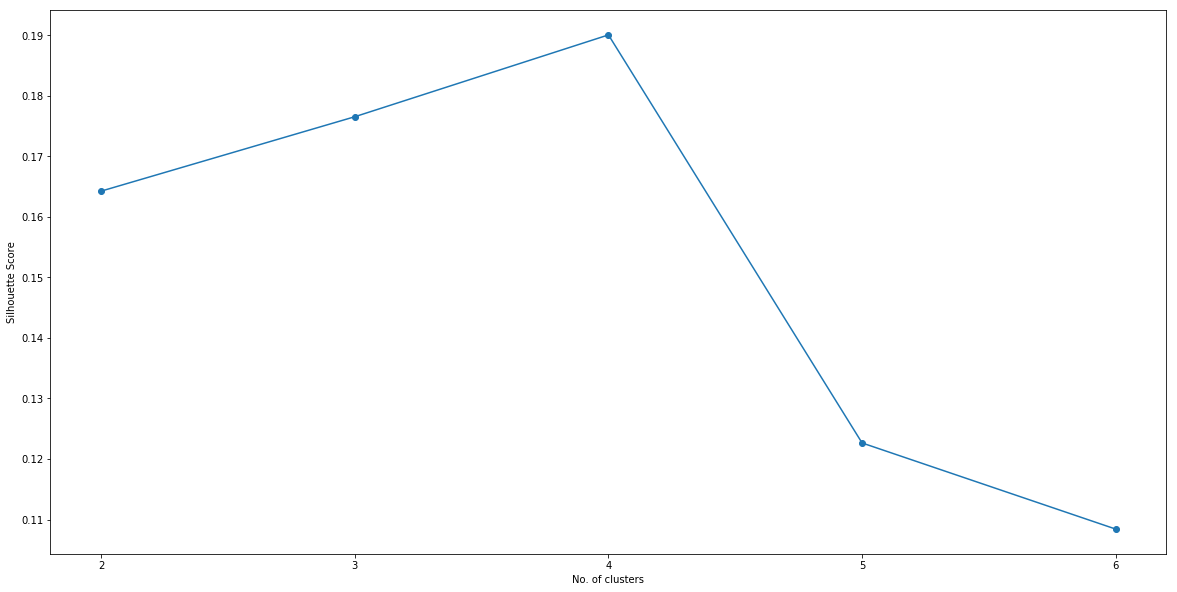

In [26]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [27]:
# run k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(shanghai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 2, 0, 3, 0, 0])

In [28]:
newDf.rename(columns={'Name':'District name'}, inplace=True)
newDf

,District name,Division code,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude
0,Huangpu Distric,310101,653800.0,39.61,31.23,121.48
1,Xuhui District,310104,1084400.0,25.74,31.18,121.43
2,Changning District,310105,694000.0,23.78,31.22,121.42
3,Jing'an District,310106,1062800.0,21.73,31.23,121.45
4,Putuo District,310107,1281900.0,8.71,31.40,121.25
5,Hongkou District,310109,797000.0,14.53,31.27,121.50
6,Yangpu District,310110,1312700.0,15.96,31.27,121.52
7,Pudong New Area,310115,5550200.0,22.87,31.22,121.53
8,Minhang District,310112,2543500.0,9.89,31.12,121.38
9,Baoshan District,310113,2042300.0,7.60,31.40,121.48


In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

shanghai_merged = newDf
shanghai_merged = shanghai_merged.join(neighborhoods_venues_sorted.set_index('District name'), on='District name')
shanghai_merged

,District name,Division code,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Huangpu Distric,310101,653800.0,39.61,31.23,121.48,0,Chinese Restaurant,Coffee Shop,Hotel,Hotpot Restaurant,Gym,Bar,Italian Restaurant,Sandwich Place,Hostel,Movie Theater
1,Xuhui District,310104,1084400.0,25.74,31.18,121.43,0,Hotel,Shanghai Restaurant,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Motel,Brewery,Squash Court,Scandinavian Restaurant,Vietnamese Restaurant
2,Changning District,310105,694000.0,23.78,31.22,121.42,0,Chinese Restaurant,Coffee Shop,Hotel,Beer Bar,Lounge,Korean Restaurant,Café,Pizza Place,Noodle House,Convenience Store
3,Jing'an District,310106,1062800.0,21.73,31.23,121.45,0,Coffee Shop,Gym / Fitness Center,Theater,Hotel Bar,Japanese Restaurant,Shanghai Restaurant,Hotel,Hotpot Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
4,Putuo District,310107,1281900.0,8.71,31.40,121.25,0,Asian Restaurant,Bar,Pizza Place,Fast Food Restaurant,Japanese Restaurant,Hotel Bar,Hotel,Hostel,History Museum,Dumpling Restaurant
5,Hongkou District,310109,797000.0,14.53,31.27,121.50,0,Multiplex,Plaza,Park,Pizza Place,Hotel,Hostel,History Museum,Historic Site,Gym / Fitness Center,Hotel Bar
6,Yangpu District,310110,1312700.0,15.96,31.27,121.52,2,Chinese Restaurant,Museum,Vietnamese Restaurant,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Historic Site
7,Pudong New Area,310115,5550200.0,22.87,31.22,121.53,0,Coffee Shop,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym
8,Minhang District,310112,2543500.0,9.89,31.12,121.38,3,Bakery,Café,Vietnamese Restaurant,Historic Site,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Gym / Fitness Center,History Museum
9,Baoshan District,310113,2042300.0,7.60,31.40,121.48,0,Fast Food Restaurant,Office,Chinese Restaurant,Shopping Mall,Vietnamese Restaurant,Gym,Electronics Store,Furniture / Home Store,Grocery Store,Gym / Fitness Center


In [30]:
#create map

neighborhoods_venues_sorted

'''
address = 'SHANGHAI'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))
'''

latitude=31.2322758
longitude=121.4692071
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
x
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(shanghai_merged['Latitude'], shanghai_merged['Longitude'], shanghai_merged['District name'], shanghai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
   
 
map_clusters


In [31]:
shanghai_merged.loc[shanghai_merged['Cluster Labels'] == 0, shanghai_merged.columns[[0] + list(range(5, shanghai_merged.shape[1]))]]

,District name,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Huangpu Distric,121.48,0,Chinese Restaurant,Coffee Shop,Hotel,Hotpot Restaurant,Gym,Bar,Italian Restaurant,Sandwich Place,Hostel,Movie Theater
1,Xuhui District,121.43,0,Hotel,Shanghai Restaurant,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Motel,Brewery,Squash Court,Scandinavian Restaurant,Vietnamese Restaurant
2,Changning District,121.42,0,Chinese Restaurant,Coffee Shop,Hotel,Beer Bar,Lounge,Korean Restaurant,Café,Pizza Place,Noodle House,Convenience Store
3,Jing'an District,121.45,0,Coffee Shop,Gym / Fitness Center,Theater,Hotel Bar,Japanese Restaurant,Shanghai Restaurant,Hotel,Hotpot Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
4,Putuo District,121.25,0,Asian Restaurant,Bar,Pizza Place,Fast Food Restaurant,Japanese Restaurant,Hotel Bar,Hotel,Hostel,History Museum,Dumpling Restaurant
5,Hongkou District,121.50,0,Multiplex,Plaza,Park,Pizza Place,Hotel,Hostel,History Museum,Historic Site,Gym / Fitness Center,Hotel Bar
7,Pudong New Area,121.53,0,Coffee Shop,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym
9,Baoshan District,121.48,0,Fast Food Restaurant,Office,Chinese Restaurant,Shopping Mall,Vietnamese Restaurant,Gym,Electronics Store,Furniture / Home Store,Grocery Store,Gym / Fitness Center
13,Qingpu District,121.12,0,Fast Food Restaurant,Restaurant,Hotel,Gym / Fitness Center,Dumpling Restaurant,Electronics Store,Furniture / Home Store,Grocery Store,Gym,Historic Site
14,Fengxian District,121.47,0,Asian Restaurant,Coffee Shop,Steakhouse,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Historic Site


In [46]:
shanghai_merged.loc[shanghai_merged['Cluster Labels'] == 1, shanghai_merged.columns[[0] + list(range(2, shanghai_merged.shape[1]))]]

,District name,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Songjiang District,1762200.0,8.92,31.02,121.22,1,Convenience Store,Grocery Store,Vietnamese Restaurant,Dim Sum Restaurant,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Gym,Gym / Fitness Center,Historic Site


In [41]:
shanghai_merged.loc[shanghai_merged['Cluster Labels'] == 2, shanghai_merged.columns[[0] + list(range(2, shanghai_merged.shape[1]))]]

,District name,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Yangpu District,1312700.0,15.96,31.27,121.52,2,Chinese Restaurant,Museum,Vietnamese Restaurant,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Historic Site
10,Jiading District,1588900.0,16.34,31.38,121.27,2,Chinese Restaurant,Bus Stop,Massage Studio,Stadium,Vietnamese Restaurant,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Gym / Fitness Center


In [43]:
shanghai_merged.loc[shanghai_merged['Cluster Labels'] == 3, shanghai_merged.columns[[0] + list(range(2, shanghai_merged.shape[1]))]]

,District name,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Minhang District,2543500.0,9.89,31.12,121.38,3,Bakery,Café,Vietnamese Restaurant,Historic Site,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Gym / Fitness Center,History Museum


In [47]:
shanghai_merged.loc[shanghai_merged['Cluster Labels'] == 0, shanghai_merged.columns[[0] + list(range(2, shanghai_merged.shape[1]))]]

,District name,Population (2018 census),"Real GDP per capita(Unit: RMB 10,000)",Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Huangpu Distric,653800.0,39.61,31.23,121.48,0,Chinese Restaurant,Coffee Shop,Hotel,Hotpot Restaurant,Gym,Bar,Italian Restaurant,Sandwich Place,Hostel,Movie Theater
1,Xuhui District,1084400.0,25.74,31.18,121.43,0,Hotel,Shanghai Restaurant,Fast Food Restaurant,Coffee Shop,Furniture / Home Store,Motel,Brewery,Squash Court,Scandinavian Restaurant,Vietnamese Restaurant
2,Changning District,694000.0,23.78,31.22,121.42,0,Chinese Restaurant,Coffee Shop,Hotel,Beer Bar,Lounge,Korean Restaurant,Café,Pizza Place,Noodle House,Convenience Store
3,Jing'an District,1062800.0,21.73,31.23,121.45,0,Coffee Shop,Gym / Fitness Center,Theater,Hotel Bar,Japanese Restaurant,Shanghai Restaurant,Hotel,Hotpot Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
4,Putuo District,1281900.0,8.71,31.40,121.25,0,Asian Restaurant,Bar,Pizza Place,Fast Food Restaurant,Japanese Restaurant,Hotel Bar,Hotel,Hostel,History Museum,Dumpling Restaurant
5,Hongkou District,797000.0,14.53,31.27,121.50,0,Multiplex,Plaza,Park,Pizza Place,Hotel,Hostel,History Museum,Historic Site,Gym / Fitness Center,Hotel Bar
7,Pudong New Area,5550200.0,22.87,31.22,121.53,0,Coffee Shop,Korean Restaurant,Sushi Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym
9,Baoshan District,2042300.0,7.60,31.40,121.48,0,Fast Food Restaurant,Office,Chinese Restaurant,Shopping Mall,Vietnamese Restaurant,Gym,Electronics Store,Furniture / Home Store,Grocery Store,Gym / Fitness Center
13,Qingpu District,1219100.0,9.46,31.15,121.12,0,Fast Food Restaurant,Restaurant,Hotel,Gym / Fitness Center,Dumpling Restaurant,Electronics Store,Furniture / Home Store,Grocery Store,Gym,Historic Site
14,Fengxian District,1152000.0,10.13,30.92,121.47,0,Asian Restaurant,Coffee Shop,Steakhouse,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Grocery Store,Gym,Historic Site


# Conclusion
Understanding the Clusters
By looking at the cluster data, we can see that cluster 4 is the one that we are the most interested in.
